#ML - Standford Andrew Ng
##Week 2 Project
###1. Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
  You would like to use this data to help you select which city to expand to next. The file ex1data1.txt contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. The ex1.m script has already been set up to load this data for you.

In [36]:
## Load the data and set variables
import numpy as np
with open('ex1data1.txt', 'r') as data_file:
    data_array = np.loadtxt(data_file, delimiter=',')

In [37]:
print (data_array)
#Done, good job

[[  6.1101   17.592  ]
 [  5.5277    9.1302 ]
 [  8.5186   13.662  ]
 [  7.0032   11.854  ]
 [  5.8598    6.8233 ]
 [  8.3829   11.886  ]
 [  7.4764    4.3483 ]
 [  8.5781   12.     ]
 [  6.4862    6.5987 ]
 [  5.0546    3.8166 ]
 [  5.7107    3.2522 ]
 [ 14.164    15.505  ]
 [  5.734     3.1551 ]
 [  8.4084    7.2258 ]
 [  5.6407    0.71618]
 [  5.3794    3.5129 ]
 [  6.3654    5.3048 ]
 [  5.1301    0.56077]
 [  6.4296    3.6518 ]
 [  7.0708    5.3893 ]
 [  6.1891    3.1386 ]
 [ 20.27     21.767  ]
 [  5.4901    4.263  ]
 [  6.3261    5.1875 ]
 [  5.5649    3.0825 ]
 [ 18.945    22.638  ]
 [ 12.828    13.501  ]
 [ 10.957     7.0467 ]
 [ 13.176    14.692  ]
 [ 22.203    24.147  ]
 [  5.2524   -1.22   ]
 [  6.5894    5.9966 ]
 [  9.2482   12.134  ]
 [  5.8918    1.8495 ]
 [  8.2111    6.5426 ]
 [  7.9334    4.5623 ]
 [  8.0959    4.1164 ]
 [  5.6063    3.3928 ]
 [ 12.836    10.117  ]
 [  6.3534    5.4974 ]
 [  5.4069    0.55657]
 [  6.8825    3.9115 ]
 [ 11.708     5.3854 ]
 [  5.7737 

In [38]:
#insert x-0 into each row
x_0 = 1
for n in range(0, len(data_array)):
    data_array_expanded = np.insert(data_array, 0, x_0, axis = 1)

In [39]:
print (data_array_expanded[:])
#Done!
#array-i[0] = x-i_0
#array-i[1] = x-i_1

[[  1.        6.1101   17.592  ]
 [  1.        5.5277    9.1302 ]
 [  1.        8.5186   13.662  ]
 [  1.        7.0032   11.854  ]
 [  1.        5.8598    6.8233 ]
 [  1.        8.3829   11.886  ]
 [  1.        7.4764    4.3483 ]
 [  1.        8.5781   12.     ]
 [  1.        6.4862    6.5987 ]
 [  1.        5.0546    3.8166 ]
 [  1.        5.7107    3.2522 ]
 [  1.       14.164    15.505  ]
 [  1.        5.734     3.1551 ]
 [  1.        8.4084    7.2258 ]
 [  1.        5.6407    0.71618]
 [  1.        5.3794    3.5129 ]
 [  1.        6.3654    5.3048 ]
 [  1.        5.1301    0.56077]
 [  1.        6.4296    3.6518 ]
 [  1.        7.0708    5.3893 ]
 [  1.        6.1891    3.1386 ]
 [  1.       20.27     21.767  ]
 [  1.        5.4901    4.263  ]
 [  1.        6.3261    5.1875 ]
 [  1.        5.5649    3.0825 ]
 [  1.       18.945    22.638  ]
 [  1.       12.828    13.501  ]
 [  1.       10.957     7.0467 ]
 [  1.       13.176    14.692  ]
 [  1.       22.203    24.147  ]
 [  1.    

In [77]:
# Set theta to be zero as beginning
# Note array != matrix 
theta_array = np.matrix(np.zeros((2,1)))
print(theta_array)

[[ 0.]
 [ 0.]]


In [76]:
#Set x_array(x_0 and x_1) and y_array for computation
# Note array != matrix 
x_array = np.matrix(data_array_expanded[:, [0,1]])
y_array = np.matrix(data_array_expanded[:, [2]])
print(x_array, '\n', y_array)

[[  1.       6.1101]
 [  1.       5.5277]
 [  1.       8.5186]
 [  1.       7.0032]
 [  1.       5.8598]
 [  1.       8.3829]
 [  1.       7.4764]
 [  1.       8.5781]
 [  1.       6.4862]
 [  1.       5.0546]
 [  1.       5.7107]
 [  1.      14.164 ]
 [  1.       5.734 ]
 [  1.       8.4084]
 [  1.       5.6407]
 [  1.       5.3794]
 [  1.       6.3654]
 [  1.       5.1301]
 [  1.       6.4296]
 [  1.       7.0708]
 [  1.       6.1891]
 [  1.      20.27  ]
 [  1.       5.4901]
 [  1.       6.3261]
 [  1.       5.5649]
 [  1.      18.945 ]
 [  1.      12.828 ]
 [  1.      10.957 ]
 [  1.      13.176 ]
 [  1.      22.203 ]
 [  1.       5.2524]
 [  1.       6.5894]
 [  1.       9.2482]
 [  1.       5.8918]
 [  1.       8.2111]
 [  1.       7.9334]
 [  1.       8.0959]
 [  1.       5.6063]
 [  1.      12.836 ]
 [  1.       6.3534]
 [  1.       5.4069]
 [  1.       6.8825]
 [  1.      11.708 ]
 [  1.       5.7737]
 [  1.       7.8247]
 [  1.       7.0931]
 [  1.       5.0702]
 [  1.       

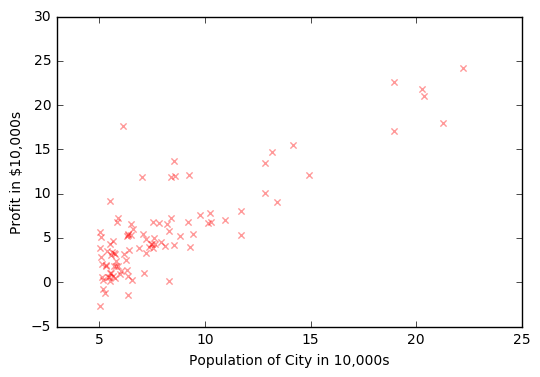

In [42]:
#plotting the data distribution
import matplotlib.pyplot as plt
for array in data_array:
    plt.scatter(x = array[0], y = array[1], color = 'r', marker = 'x', alpha = 0.4)
plt.xlabel('Population of City in 10,000s')
plt.xlim(3, 25)
plt.ylabel('Profit in $10,000s')
plt.show()

In [80]:
#Build hypothesis function
def hypothesis_fun(x, theta):
    h_x = x * theta
    #np.metrix * np.metrix => metrixes multiplication
    return h_x

In [104]:
#Build gradient descent function!
#Basic algorithm for linear regression
from collections import defaultdict
def gradient_descent(iterations, learning_rate):
    theta_array = np.matrix(np.zeros((2,1)))
    #already transpose!!! [[0.],
    #                      [0.]]
    #array != matrix
    d = defaultdict(float)
    m = len(x_array)
    for i in range(0, iterations):
        j_theta = (1/(2*m))*np.sum(np.square((hypothesis_fun(x_array, theta_array) - y_array)))
        # **2 => np.square()
        for j in range(0, len(theta_array)):
            d['theta%s_update' %j] = theta_array[j][0] - learning_rate*(1/m) * np.transpose(
                x_array[:,[j]]) * (hypothesis_fun(x_array, theta_array) - y_array)
        #print(j_theta, d, theta_array)
        for j in range(0, len(theta_array)):
            theta_array[j][0] = d['theta%s_update' %j]
    return theta_array, j_theta
    
    

In [114]:
gradient_descent(1500, 0.01)

(array([[-3.63029144],
        [ 1.16636235]]), 4.4834114533748686)

In [85]:
#print(hypothesis_fun(x_array, theta_array))

In [82]:
x1 = np.matrix(np.arange(9.0).reshape((3, 3)))
x2 = np.matrix(np.arange(3.0).reshape((3, 1)))
x1 * x2

matrix([[  5.],
        [ 14.],
        [ 23.]])

In [100]:
#np.transpose(x_array[:,[0]]) * (hypothesis_fun(x_array, theta_array) - y_array)

matrix([[-566.3961]])